In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor,BaggingRegressor,AdaBoostRegressor

from sklearn.ensemble import VotingRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,d2_pinball_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("ai4i2020.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
X = data.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], axis=1)
y = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']]


scaler = StandardScaler()
y2 = scaler.fit_transform(y)
#y1 = scaler.fit_transform(y1)
#y2 = scaler.fit_transform(y2)



In [6]:
modelos = [('Gaussian',GaussianProcessRegressor()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('VottingRegressor',KNeighborsRegressor())]

In [7]:
resultado_D2 = []
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_D2 = []

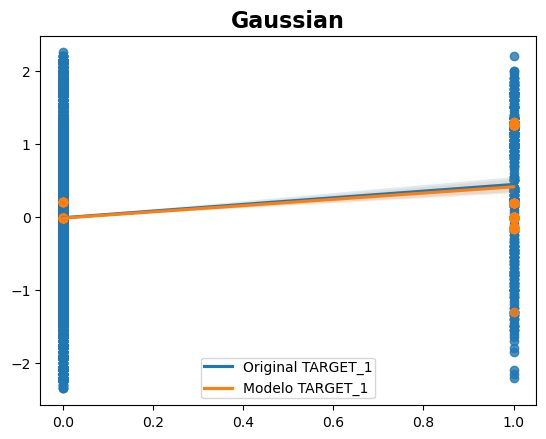

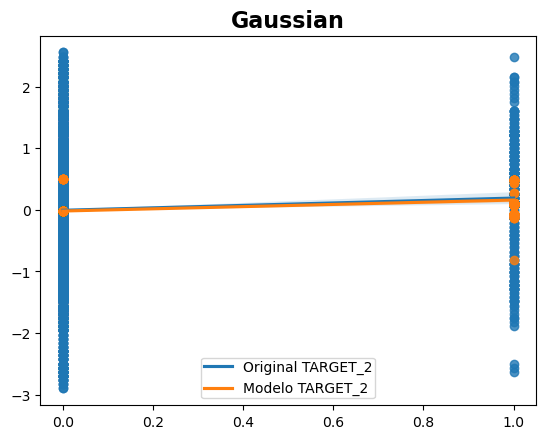

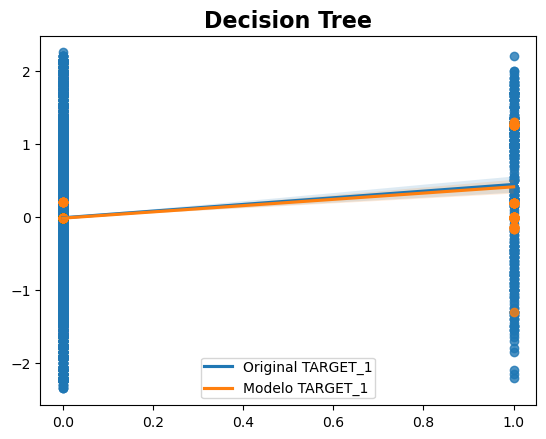

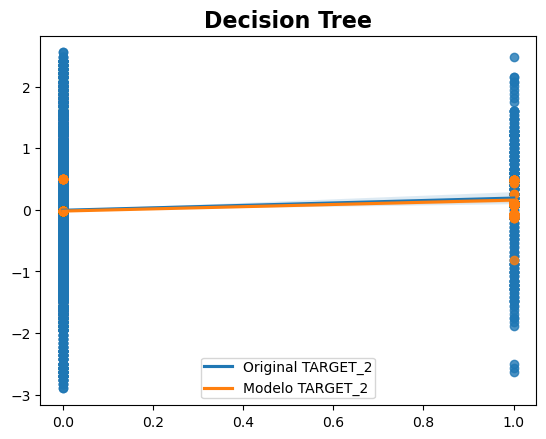

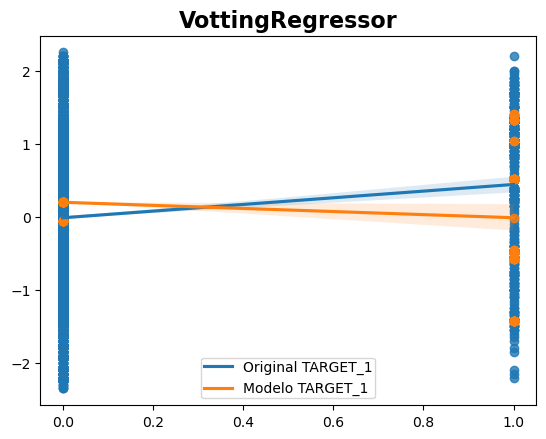

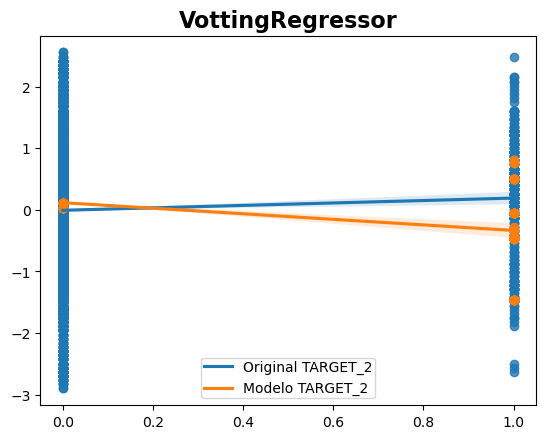

In [8]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'Original TARGET_1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'Modelo TARGET_1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'Original TARGET_2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'Modelo TARGET_2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #D2 (root mean squared error)
    resultado_D2.append((nombre,d2_pinball_score(y_test,y_pred)))
   

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_D2.sort(key=lambda k:k[1], reverse=True)

In [9]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.17441409])),
 ('Gaussian', array([0.17440525])),
 ('VottingRegressor', array([0.11315636]))]

In [10]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.03042028])),
 ('Gaussian', array([0.03041719])),
 ('VottingRegressor', array([0.01280436]))]

In [11]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('VottingRegressor', 16192.527426472094),
 ('Decision Tree', 15298.364626920862),
 ('Gaussian', 15298.008657181588)]

In [12]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('VottingRegressor', 0.7996721816690382),
 ('Gaussian', 0.7777064557471017),
 ('Decision Tree', 0.7776686243724833)]

In [13]:
print("D2 ")
resultado_D2

D2 


[('Decision Tree', 0.0060042951381287235),
 ('Gaussian', 0.0059411232827698834),
 ('VottingRegressor', -0.021747278819950366)]

In [14]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('VottingRegressor', 1.012032964154512),
 ('Decision Tree', 0.9561477891825562),
 ('Gaussian', 0.9561255410738448)]

In [15]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('VottingRegressor', 1.0057685166391648),
 ('Decision Tree', 0.977810414486081),
 ('Gaussian', 0.9777991285683911)]

In [16]:
resultado_R.clear()
resultado_D2.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_D2.clear()

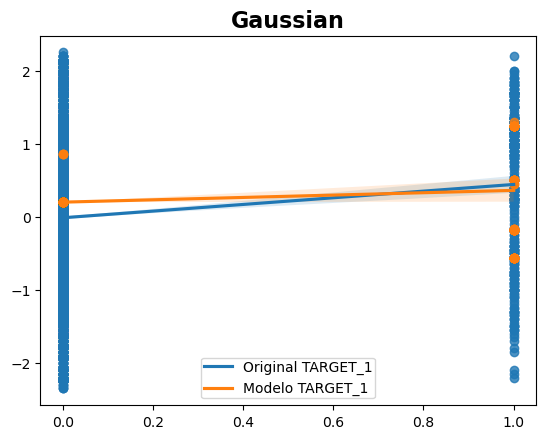

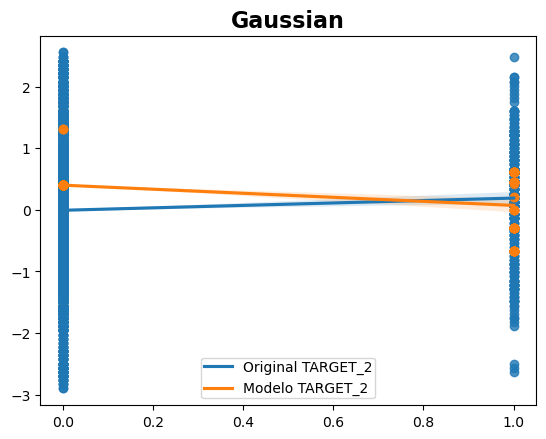

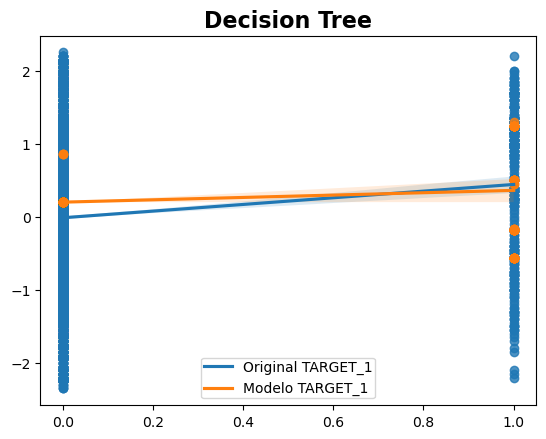

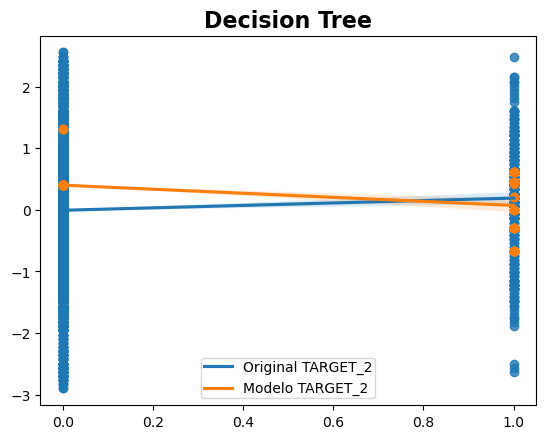

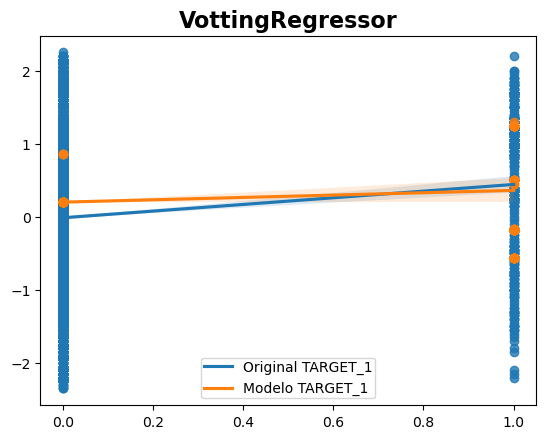

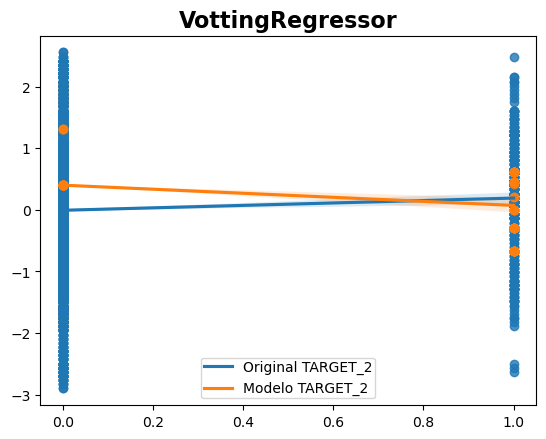

In [17]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
D2 = [0,0,0]

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X, y2, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MAPE (Mean Absolute Percentage Error)
        D2[j] += d2_pinball_score(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'Original TARGET_1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'Modelo TARGET_1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'Original TARGET_2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'Modelo TARGET_2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #MAPE (Mean Absolute Percentage Error)
    resultado_D2.append((nombre,D2[j]/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_D2.sort(key=lambda k:k[1], reverse=True)

In [18]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.16940052])),
 ('Gaussian', array([0.16938328])),
 ('VottingRegressor', array([0.08269425]))]

In [19]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.0290035])),
 ('Gaussian', array([0.02899933])),
 ('VottingRegressor', array([0.00782843]))]

In [20]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('VottingRegressor', 11654.410751589907),
 ('Gaussian', 9727.826827051847),
 ('Decision Tree', 9727.823192203095)]

In [21]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('VottingRegressor', 0.8494692956246825),
 ('Gaussian', 0.7854687063062181),
 ('Decision Tree', 0.7854555522948348)]

In [22]:
print("D2 ")
resultado_D2

D2 


[('Decision Tree', 0.008315115382247159),
 ('Gaussian', 0.008297405505147064),
 ('VottingRegressor', -0.07199661966193263)]

In [23]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('VottingRegressor', 1.1654410751589914),
 ('Gaussian', 0.972782682705185),
 ('Decision Tree', 0.97278231922031)]

In [24]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('VottingRegressor', 1.0742827476830323),
 ('Gaussian', 0.9861748145378406),
 ('Decision Tree', 0.9861746770630567)]

In [25]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_D2.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
D2.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

In [26]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
D2 = [0,0,0]
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X):
    j=0
    X_train, X_test, y_train, y_test = X[train], X[test], y2[train], y2[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MAPE (Mean Absolute Percentage Error)
        D2[j] += d2_pinball_score(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        
        j += 1

j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'Original TARGET_1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'Modelo TARGET_1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'Original TARGET_2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'Modelo TARGET_2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MAPE (Mean Absolute Percentage Error)
    resultado_D2.append((nombre,D2[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_D2.sort(key=lambda k:k[1], reverse=True)

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,   10,   11,   12,\n            ...\n            9988, 9989, 9990, 9991, 9992, 9993, 9995, 9996, 9997, 9998],\n           dtype='int64', length=8000)] are in the [columns]"

In [ ]:
print("R (Pearson correlation coefficient)")
resultado_R

In [ ]:
print("R2 (coefficient of determination)")
resultado_R2

In [ ]:
print("SSE (sum of squared errors)")
resultado_SSE

In [ ]:
print("MAE (mean absolute error)")
resultado_MAE

In [ ]:
print("D2 (Mean Absolute Percentage Error)")
resultado_D2

In [ ]:
print("MSE (mean squared error)")
resultado_MSE

In [ ]:
print("RMSE (root mean squared error)")
resultado_RMSE

In [ ]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_D2.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
D2.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()